# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 02/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 6 [here](https://www.nltk.org/book/ch06.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
4. Writing Structured Programs
5. Categorizing and Tagging Words
6. [Learning to Classify Text](#textclass)
    1. [Supervised Classification](#supervisedclass)
        1. [Gender Identification](#gender)
        1. [Choosing the Right Features](#features)
        1. [Document Classification](#docclass)
        1. [POS Tagging](#postag)
        1. [Exploiting Context](#context)
        1. [Sequence Classification](#seqclass)
        1. [Other Methods for Sequence Classification](#other)

<a name="textclass"></a>
# 6. Learning to Classify Text

__Detecting patterns__ is a central part of NLP. 

Words ending in `-ed` tend to be __past tense verbs__. Frequent use of `will` is indicative of __news text__. 

These observable patterns — __word structure__ and __word frequency__ — __happen to correlate__ with particular aspects of meaning, such as __tense__ and __topic__. 

But how did we know where to start looking, which aspects of form to associate with which aspects of meaning?

The goal of this chapter is to answer the following questions:

1. How can we identify particular features of language data that are salient for classifying it?

1. How can we construct models of language that can be used to perform language processing tasks automatically?

1. What can we learn about language from these models?


Along the way we will study some important __machine learning techniques__, including decision trees, naive Bayes' classifiers, and maximum entropy classifiers.

<a name="supervisedclass"></a>
# 6.1 Supervised Classification

Classification is __the task of choosing the correct class label for a given input__. 

In basic classification tasks, each input is considered in isolation from all other inputs, and the __set of labels is defined in advance__. 

Some examples of classification tasks are:

* Deciding whether an email is spam or not.

* Deciding what the topic of a news article is, from a fixed list of topic areas such as "sports," "technology," and "politics."

* Deciding whether a given occurrence of the word `bank` is used to refer to a river bank, a financial institution, the act of tilting to the side, or the act of depositing something in a financial institution.

The basic classification task has a number of interesting variants. For example, in __multi-class classification__, each instance may be assigned multiple labels; in __open-class classification__, the set of labels is not defined in advance; and in __sequence classification__, a list of inputs are jointly classified.

A classifier is called supervised if it is built based on training corpora containing the correct label for each input. The framework used by supervised classification is shown in the figure below.

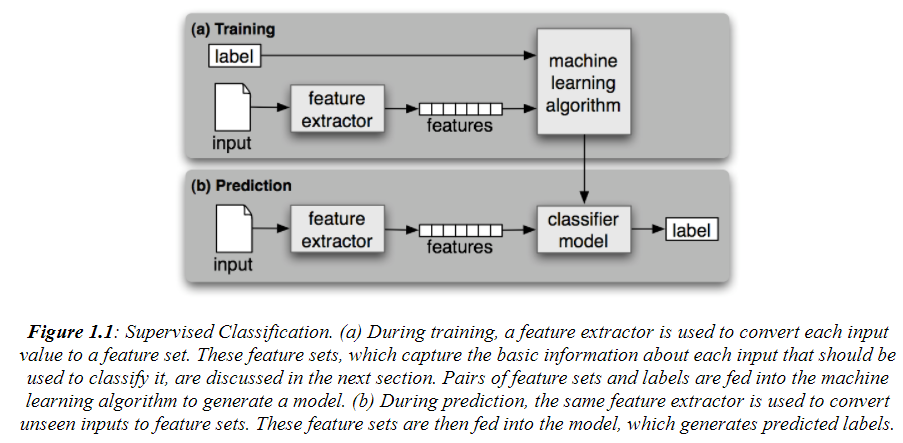

<a name="gender"></a>
## 6.1.1 Gender Identification

Male and female names have some __distinctive characteristics__. 

Names ending in `a`, `e` and `i` are likely to be __female__, while names ending in `k`, `o`, `r`, `s` and `t` are likely to be __male__. 

Let's build a classifier to model these differences more precisely.

The first step in creating a classifier is __deciding what features of the input are relevant__, and __how to encode those features__. 

For this example, we'll start by just looking at the final letter of a given name. The following feature extractor function builds a dictionary containing relevant information about a given name.

In [1]:
def gender_features(word):
    return {'last_letter': word[-1]}

gender_features('Shrek')

{'last_letter': 'k'}

The returned dictionary, known as a __feature set__, maps from feature names to their values. 

__Feature names are _case-sensitive strings__ that typically provide a short human-readable description of the feature, as in the example `'last_letter'`. 

__Feature values are values with simple types__, such as booleans, numbers, and strings.

Most classification methods require that __features be encoded using simple value types__, such as booleans, numbers, and strings. 

But note that __just because a feature has a simple type, this does not necessarily mean that the feature's value is simple to express or compute__. 

Indeed, it is even possible to use very complex and informative values, such as the output of a second supervised classifier, as features.

Now that we've defined a feature extractor, we need to __prepare a list of examples and corresponding class labels__.

In [3]:
from nltk.corpus import names
import random

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + 
                 [(name, 'female') for name in names.words('female.txt')])
                 
random.shuffle(labeled_names)

Next, we __use the feature extractor to process the names data__, and divide the resulting list of feature sets into a __training set and a test set__. 

The training set is used to __train a new "naive Bayes" classifier__.

In [4]:
from nltk import NaiveBayesClassifier

features_sets = [(gender_features(n), gender) for (n, gender) in labeled_names]

train_set, test_set = features_sets[500:], features_sets[:500]

classifier = NaiveBayesClassifier.train(train_set)

Now, let's __test it out on some names that did not appear in its training data__.

In [5]:
classifier.classify(gender_features('Neo'))

'male'

In [6]:
classifier.classify(gender_features('Trinity'))

'female'

We can __systematically evaluate the classifier on a much larger quantity of unseen data__.

In [7]:
from nltk.classify import accuracy

accuracy(classifier, test_set)

0.782

Finally, we can examine the classifier to determine __which features it found most effective for distinguishing the names' genders__.

In [8]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     34.8 : 1.0
             last_letter = 'k'              male : female =     32.2 : 1.0
             last_letter = 'f'              male : female =     15.7 : 1.0
             last_letter = 'p'              male : female =     11.7 : 1.0
             last_letter = 'v'              male : female =     11.0 : 1.0


This listing shows that the names in the training set that end in `"a"` are __female 33 times more often than they are male__, but names that end in `"k"` are __male 32 times more often than they are female__. 

These ratios are known as __likelihood ratios__, and can be useful for comparing different feature-outcome relationships.

__Your Turn__: Modify the `gender_features()` function to provide the classifier with features encoding:
1. the length of the name
1. its first letter
1. and any other features that seem like they might be informative. 

Retrain the classifier with these new features, and test its accuracy.

In [14]:
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy

# modify function
def gender_features(word):
    # extract last letter
    return {'last_letter': word[-1],
            # extract first letter
            'first_letter': word[0],
            # extract word length
            'name_length': len(word),
           }

# test function
print(gender_features('Shrek'), "\n")

# create feature sets
features_sets = [(gender_features(n), gender) 
                 for (n, gender) in labeled_names]

# split data
train_set, test_set = features_sets[500:], features_sets[:500]

# train model
classifier = NaiveBayesClassifier.train(train_set)

# evaluate model's accuracy
accuracy(classifier, test_set)

{'last_letter': 'k', 'first_letter': 'S', 'name_length': 5} 



0.802

When working with large corpora, constructing a single list that contains the features of every instance can use up a __large amount of memory__. 

In these cases, use the function `nltk.classify.apply_features`, which returns an object that acts like a list but does not store all the feature sets in memory.

In [17]:
from nltk.classify import apply_features

train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

print(type(train_set))

<class 'nltk.collections.LazyMap'>


<a name="features"></a>
## 6.1.2 Choosing the Right Features

<a name="docclass"></a>
## 6.1.3 Document Classification

<a name="postag"></a>
## 6.1.4 POS Tagging

<a name="context"></a>
## 6.1.5 Exploiting Context

<a name="seqclass"></a>
## 6.1.6 Sequence Classification

<a name="other"></a>
## 6.1.7 Other Methods for Sequence Classification